# 6. 計算氣候場及距平值

進行氣候分析時，最常從分析**氣候場 (Climatology)** 和**距平值 (Anomaly)** 開始。

## 利用`groupby`計算月氣候平均與距平

先準備資料。

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib as mpl
from matplotlib import pyplot as plt
import cmaps 

mpl.rcParams['figure.dpi'] = 100

# 選擇資料的時空範圍。
lats = -20
latn =  30
lon1 =  79 
lon2 = 161
time1 = '2017-12-01'
time2 = '2017-12-31'

# 開啟檔案
olr_ds = xr.open_dataset("data/olr.nc") 
olr = (olr_ds.sel(time=slice('1998-01-01','2016-12-31'),
                    lat=slice(lats,latn),
                    lon=slice(lon1,lon2)).olr)
olrrt = (olr_ds.sel(time=slice('2017-12-01','2017-12-31'),
                    lat=slice(lats,latn),
                    lon=slice(lon1,lon2)).olr)


/Users/waynetsai/.local/lib/python3.10/site-packages/ecmwflibs/__init__.py:83: UserWarning: dlopen(/Users/waynetsai/.local/lib/python3.10/site-packages/ecmwflibs/_ecmwflibs.cpython-310-darwin.so, 0x0002): tried: '/Users/waynetsai/.local/lib/python3.10/site-packages/ecmwflibs/_ecmwflibs.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/waynetsai/.local/lib/python3.10/site-packages/ecmwflibs/_ecmwflibs.cpython-310-darwin.so' (no such file), '/Users/waynetsai/.local/lib/python3.10/site-packages/ecmwflibs/_ecmwflibs.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))
  warnings.warn(str(e))


我們在第4單元中，已經了解過如何在xarray中操控datetime物件，因此在計算氣候場的時候，也可以將資料按照各月分類，這種聚集並分類的函數稱為`groupby`。按照月份分類後，將同類的平均，就可以達到計算月平均氣候場的效果。

In [2]:
olrGB = olr.groupby("time.month")
olrMonClim = olrGB.mean("time")  # 這邊的mean指的是幫groupby的各組平均，和第3章學的mean意義稍有不同。
olrMonClim

<xarray.DataArray 'olr' (month: 12, lat: 50, lon: 82)>
array([[[270.46295, 270.73306, 270.65665, ..., 257.25116, 256.66913,
         255.88489],
        [269.24954, 268.8672 , 269.106  , ..., 253.44594, 253.16605,
         252.61195],
        [267.06573, 267.1016 , 267.57956, ..., 249.2561 , 248.4184 ,
         247.00945],
        ...,
        [257.9647 , 257.92267, 258.25693, ..., 256.99442, 256.7958 ,
         257.13882],
        [253.88763, 253.44121, 252.49252, ..., 252.67389, 252.67776,
         252.66585],
        [245.34576, 240.01846, 228.33456, ..., 248.6515 , 248.66846,
         248.49454]],

       [[266.90402, 267.24286, 267.5611 , ..., 255.47618, 254.07542,
         253.18782],
        [264.35098, 264.7394 , 264.88358, ..., 251.78017, 251.39395,
         251.59004],
        [261.4748 , 262.0324 , 262.23868, ..., 247.40343, 248.10788,
         248.63504],
...
        [281.75525, 281.8884 , 282.38974, ..., 263.41367, 263.98563,
         264.8334 ],
        [279.72992, 279.606  , 276.21063, ..., 257.44904, 258.60928,
         259.01102],
        [270.86935, 264.80884, 252.717  , ..., 252.37294, 253.24257,
         254.25145]],

       [[277.6884 , 277.96237, 278.4138 , ..., 268.97833, 268.33752,
         267.38034],
        [276.88388, 276.72455, 277.11646, ..., 267.85056, 267.2011 ,
         266.11264],
        [274.72495, 274.7343 , 275.10522, ..., 266.41324, 264.9135 ,
         264.2871 ],
        ...,
        [269.02094, 269.55533, 270.47006, ..., 258.97546, 259.5016 ,
         260.03702],
        [266.66284, 267.0835 , 265.3553 , ..., 253.46599, 253.83995,
         254.14189],
        [258.7794 , 254.24706, 243.16267, ..., 248.40625, 248.42702,
         248.41463]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

計算距平時，將即時(real time)的資料也對月份進行groupby，再直接減去氣候場即可，xarray會根據氣候場中的groupby分類進行計算。

In [3]:
olra = olrrt.groupby('time.month').mean() - olrMonClim
olra

<xarray.DataArray 'olr' (month: 1, lat: 50, lon: 82)>
array([[[ 9.78241   ,  9.909576  ,  8.493408  , ...,  2.497589  ,
          1.3457642 , -0.74990845],
        [ 8.7960205 ,  9.101654  ,  9.233459  , ...,  0.71640015,
         -0.6616211 , -2.1523438 ],
        [ 7.6419373 ,  9.022461  , 10.015717  , ...,  1.4698181 ,
         -0.83166504, -3.696045  ],
        ...,
        [-6.5422363 , -5.305298  , -6.9757385 , ..., 10.722809  ,
         12.269043  , 13.60672   ],
        [-5.522644  , -5.337219  , -5.0463257 , ...,  7.494705  ,
          8.71553   ,  9.534042  ],
        [-5.712723  , -4.6646423 , -4.2814636 , ...,  4.3125763 ,
          5.6015167 ,  6.79834   ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
  * month    (month) int64 12

我們把資料畫出來看看。

/Users/waynetsai/micromamba/envs/p3/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


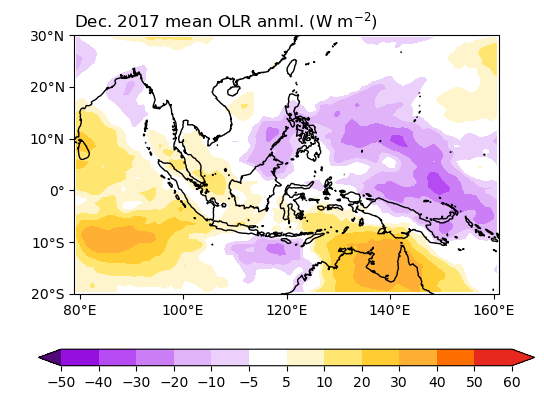

In [4]:
from matplotlib import pyplot as plt
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmaps

olr_anml_cmap=cmaps.sunshine_diff_12lev

proj = ccrs.PlateCarree() 
fig,ax = plt.subplots(1,1,subplot_kw={'projection':proj}) 
clevs = [-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60]
olrPlot = (olra[0,:,:]
               .plot.contourf("lon", "lat",              
                              transform=proj,     
                              ax=ax,            
                              levels=clevs,      
                              cmap=olr_anml_cmap,     
                              add_colorbar=True,  
                              extend='both',  
                              cbar_kwargs={'orientation': 'horizontal', 'aspect': 30, 'label': ' ', 'ticks':clevs}) 
                              )

ax.set_extent([lon1,lon2,lats,latn],crs=proj)
ax.set_xticks(np.arange(80,180,20), crs=proj)
ax.set_yticks(np.arange(-20,40,10), crs=proj)   # 設定x, y座標的範圍，以及多少經緯度繪製刻度。
lon_formatter = LONGITUDE_FORMATTER
lat_formatter = LATITUDE_FORMATTER   
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)  # 將經緯度以degN, degE的方式表示。
ax.coastlines()                # 繪製地圖海岸線。                              
ax.set_ylabel(' ')             # 設定坐標軸名稱。
ax.set_xlabel(' ')
plt.title(' ')
plt.title("Dec. 2017 mean OLR anml. (W m$^{-2}$)", loc='left')  
plt.show()

## 計算日氣候平均與距平

和計算月氣候場類似，datetime物件有`dayofyear`的attribute，因此利用`groupby('time.dayofyear')`就可以計算氣候場。

In [5]:
olrGB = olr.groupby("time.dayofyear")
olrDayClim = olrGB.mean("time")
olrDayClim

olra = olrrt.groupby('time.dayofyear') - olrDayClim

## 計算「平滑」氣候場

平滑氣候場是保留氣候場的前*n*個諧函數 (harmonics)，必須運用傅立葉變換 (fast Fourier transform, FFT) 計算。計算FFT需要用到`scipy`函式庫。然而由於`scipy`目前尚不支援`xarray.DataArray`，因此必須先轉換成`numpy.ndarray`才能進行FFT運算，或是利用[`xrft` (Fourier transforms for xarray data)](https://xrft.readthedocs.io/en/latest/)模組。下列程式碼`smthClmDay`函數和NCL完全一樣。

In [6]:
from scipy.fft import rfft, irfft

def smthClmDay(clmDay, nHarm):
    nt, ny, nx = clmDay.shape
    cf = rfft(clmDay.values, axis=0)     # xarray.DataArray.values 可將DataArray 轉換成numpy.ndarray。
    cf[nHarm,:,:] = 0.5*cf[nHarm,:,:]    # mini-taper.
    cf[nHarm+1:,:,:] = 0.0               # set all higher coef to 0.0
    icf = irfft(cf, n=nt, axis=0)       # reconstructed series
    clmDaySmth = clmDay.copy(data=icf, deep=False)
    return(clmDaySmth)

olrDayClim_sm = smthClmDay(olrDayClim, 3)
olrDayClim_sm

<xarray.DataArray 'olr' (dayofyear: 366, lat: 50, lon: 82)>
array([[[273.80515, 274.10938, 274.2879 , ..., 261.79453, 260.9497 ,
         259.96237],
        [272.50845, 272.31113, 272.69553, ..., 259.65186, 259.0594 ,
         258.18594],
        [270.22046, 270.31717, 270.83304, ..., 256.96295, 255.90952,
         254.99857],
        ...,
        [260.15997, 260.5604 , 261.29028, ..., 257.65775, 257.77252,
         258.23935],
        [256.91174, 257.18832, 256.1388 , ..., 252.47044, 252.64952,
         252.72314],
        [249.13116, 244.76387, 233.80005, ..., 247.78957, 247.84798,
         247.76076]],

       [[273.66003, 273.96432, 274.14062, ..., 261.48926, 260.66068,
         259.6891 ],
        [272.35568, 272.1524 , 272.53165, ..., 259.30475, 258.74103,
         257.90274],
        [270.0584 , 270.1501 , 270.6593 , ..., 256.57834, 255.56288,
         254.67546],
...
        [260.96295, 261.39435, 262.15237, ..., 257.77438, 257.91214,
         258.39255],
        [257.76877, 258.06982, 256.98972, ..., 252.51714, 252.72371,
         252.81175],
        [249.98839, 245.6104 , 234.62175, ..., 247.77896, 247.85403,
         247.79373]],

       [[273.94824, 274.25226, 274.4333 , ..., 262.10028, 261.2389 ,
         260.23553],
        [272.6587 , 272.46793, 272.85754, ..., 259.9982 , 259.37653,
         258.46808],
        [270.37982, 270.48196, 271.00443, ..., 257.34586, 256.2545 ,
         255.32027],
        ...,
        [260.5534 , 260.96948, 261.71365, ..., 257.7139 , 257.84018,
         258.31378],
        [257.33243, 257.6214 , 256.55756, ..., 252.49161, 252.68434,
         252.7651 ],
        [249.55333, 245.18178, 234.20656, ..., 247.78218, 247.84874,
         247.7748 ]]], dtype=float32)
Coordinates:
  * lon        (lon) float32 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat        (lat) float32 -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

選取澳洲季風區，繪製氣候的時序圖。

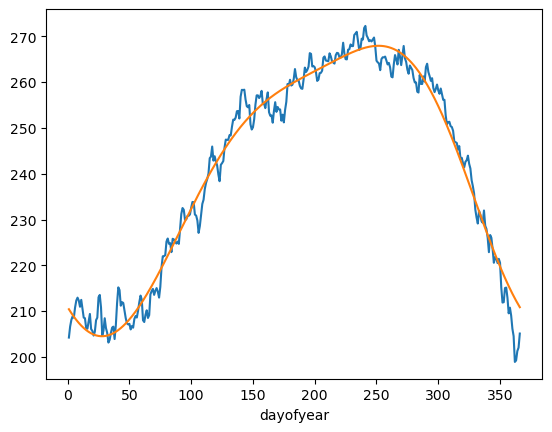

In [7]:
nt, ny, nx = olrDayClim.shape
olrDayClim1 = xr.DataArray(data=olrDayClim.values, 
                           dims=['dayofyear','lat','lon'],
                           coords=dict(dayofyear=range(1,nt+1),
                                       lat=olrDayClim.lat,
                                       lon=olrDayClim.lon)) 
olrDayClim_sm1 = xr.DataArray(data=olrDayClim_sm.values, 
                              dims=['dayofyear','lat','lon'],
                              coords=dict(dayofyear=range(1,nt+1),
                                          lat=olrDayClim.lat,
                                          lon=olrDayClim.lon)) 

plt.figure()                   
(olrDayClim1.sel(lon=slice(115,150),lat=slice(-15,-2))
            .mean(["lat","lon"])
            .plot.line(x="dayofyear"))
(olrDayClim_sm1.sel(lon=slice(115,150),lat=slice(-15,-2))
               .mean(["lat","lon"])
               .plot.line(x="dayofyear"))
plt.show()

上圖藍線的部分為原始的氣候場，橘線的部分則是保留前三個諧函數的氣候場，縱軸為OLR，橫軸則是一年之中的天數。

## 用`pandas.MultiIndex`建立日期座標來計算氣候場

以上的作法有一個小問題：由於datetime物件的日曆格式，一般年時dayofyear的範圍是1...365，但閏年時卻是1...366，因此同樣是3月1日，一般年的dayofyear是60，但閏年時卻是61，導致閏年的氣候場從3月1日開始相較於其它年會往後移動一天。但是這樣的差異，在進行多年的氣候平均，又做了前三個諧函數濾波之後，其實幾乎就沒有差異了。但如果還是想要避免這個誤差的話，可以參考[Stack Overflow問答](https://stackoverflow.com/questions/69784076/xarray-groupby-according-to-multi-indexs)這篇的作法，使用Multi-index groupby，也就是將日期用兩種index (即月、日) 分類，按照相同的月／日分群進行平均就可以得到日氣候場。而要在xarray中建立Multi-index通常使用pandas。

In [8]:
grouper = xr.DataArray(
                    pd.MultiIndex.from_arrays(
                                             [olr.time.dt.month.values, olr.time.dt.day.values],
                                             names=['month', 'day']), 
                    dims=['time'], 
                    coords=[olr.time],
                   )
olrGB = olr.groupby(grouper)
olrDayClim = olrGB.mean()
olrDayClim 

<xarray.DataArray 'olr' (group: 365, lat: 50, lon: 82)>
array([[[275.55728, 276.54013, 277.6245 , ..., 266.4256 , 261.806  ,
         256.97592],
        [271.42606, 273.49188, 275.5512 , ..., 265.4208 , 261.16055,
         258.88416],
        [269.327  , 272.3724 , 274.97632, ..., 266.53253, 263.97916,
         260.42838],
        ...,
        [256.7524 , 255.38773, 254.20909, ..., 258.3623 , 256.467  ,
         255.85208],
        [253.53944, 252.09029, 248.21416, ..., 254.66516, 253.68051,
         252.92639],
        [243.514  , 235.9991 , 223.12402, ..., 252.18465, 251.65887,
         251.67668]],

       [[266.20474, 268.61728, 269.68546, ..., 270.8527 , 267.73376,
         265.09494],
        [264.3772 , 268.11807, 272.9121 , ..., 267.90686, 267.9379 ,
         265.27838],
        [264.11343, 269.2573 , 272.4137 , ..., 265.5363 , 266.38144,
         263.24698],
...
        [251.53069, 252.98149, 255.76465, ..., 254.974  , 255.07802,
         256.7515 ],
        [250.71376, 250.6916 , 250.74278, ..., 247.69414, 248.49252,
         249.42802],
        [247.05325, 242.05045, 228.88042, ..., 242.61389, 242.83167,
         242.44658]],

       [[278.89948, 278.50262, 279.78247, ..., 266.84204, 260.7723 ,
         256.52045],
        [273.61664, 273.47092, 275.00528, ..., 264.80386, 259.15552,
         256.94455],
        [269.77542, 270.22888, 273.07074, ..., 263.5273 , 259.77316,
         259.5152 ],
        ...,
        [255.64615, 253.61986, 252.87692, ..., 254.2591 , 254.60645,
         255.94365],
        [250.28539, 250.46992, 247.14093, ..., 247.19354, 248.55852,
         247.40335],
        [243.30751, 237.3538 , 224.35126, ..., 243.6021 , 245.26958,
         244.68266]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
  * group    (group) object MultiIndex
  * month    (group) int64 1 1 1 1 1 1 1 1 1 1 ... 12 12 12 12 12 12 12 12 12 12
  * day      (group) int64 1 2 3 4 5 6 7 8 9 10 ... 23 24 25 26 27 28 29 30 31
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

同理，將即時的olr資料進行月/日分類，然後再減去氣候場，就可以得到距平值。

In [9]:
# 另一組grouper。
grouper1 = xr.DataArray(
                    pd.MultiIndex.from_arrays(
                                             [olrrt.time.dt.month.values, olrrt.time.dt.day.values],
                                             names=['month', 'day']), 
                    dims=['time'], 
                    coords=[olrrt.time],
                   )
olrrtGB = olrrt.groupby(grouper1)

olra =  olrrtGB - olrDayClim
olra

<xarray.DataArray 'olr' (time: 31, lat: 50, lon: 82)>
array([[[ 13.704773  ,  15.109009  ,  12.878937  , ..., -54.183212  ,
         -73.50813   , -68.62732   ],
        [ 19.4534    ,  19.543701  ,  18.546448  , ..., -52.459564  ,
         -60.05954   , -50.794464  ],
        [ 24.460175  ,  23.976593  ,  23.317444  , ..., -47.908966  ,
         -50.708405  , -54.80075   ],
        ...,
        [ 15.7473755 ,  17.249878  ,  15.353302  , ...,  23.260834  ,
          23.680878  ,  20.842041  ],
        [ 10.4704895 ,   9.605225  ,   9.93811   , ...,  20.312744  ,
          21.57254   ,  19.565369  ],
        [  9.06192   ,  10.407959  ,   8.299484  , ...,  30.240723  ,
          26.335663  ,  28.194885  ]],

       [[ 12.072968  ,  12.46286   ,  11.166382  , ...,   3.3347168 ,
          -2.691681  , -17.87941   ],
        [ 19.253296  ,  16.912842  ,  14.450348  , ...,  11.276276  ,
         -16.642563  , -24.297821  ],
        [ 27.846039  ,  25.520111  ,  20.153198  , ...,  19.735596  ,
          -9.782639  , -18.835938  ],
...
        [ 28.224838  ,  25.6931    ,  17.891449  , ...,   2.3854675 ,
          -1.5048828 ,  -9.9785    ],
        [ 31.848648  ,  29.524582  ,  23.120224  , ...,  -1.6408081 ,
          -3.447403  ,  -6.5221863 ],
        [ 30.846802  ,  25.651062  ,  22.978333  , ...,   3.466629  ,
          -3.4124298 ,  -2.3715515 ]],

       [[ 15.812714  ,  24.250153  ,  24.052948  , ...,  -6.747101  ,
          10.18869   ,   8.011688  ],
        [ 20.912537  ,  26.442352  ,  25.50885   , ...,  -4.769104  ,
          12.966644  ,  14.544495  ],
        [ 20.990906  ,  24.864594  ,  22.321228  , ...,   7.7335815 ,
          21.59378   ,  27.109741  ],
        ...,
        [ 15.216736  ,  11.739334  ,   9.068115  , ...,  14.774506  ,
          14.711273  ,  20.791306  ],
        [ 17.75206   ,  15.910721  ,   7.664322  , ...,  14.993011  ,
          20.03865   ,  22.741272  ],
        [ 14.902145  ,  10.488312  ,   9.08168   , ...,  13.184586  ,
          12.378677  ,  11.702133  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-01 2017-12-02 ... 2017-12-31
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
    group    (time) object MultiIndex
    month    (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12
    day      (time) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31

得到的距平場`olra`的時空範圍和`olr`完全一樣。

## 自定義函式庫

以上的手續其實略嫌繁瑣，因此如果可以直接建立一個自建函式庫檔案 (例如命名為`clim_n_anml.py`)，放在執行程式的資料夾，就可以直接import進程式使用。以下是寫好的函式範例：

In [10]:
import xarray as xr 
import numpy as np
import pandas as pd
from scipy.fft import rfft, irfft

def clmDayTLL(data):
    DayClm = data.groupby("time.dayofyear").mean("time")
    
    return(DayCLm)

def smthClmDay(clmDay, nHarm):
    nt, ny, nx = clmDay.shape
    cf = rfft(clmDay.values, axis=0)     # xarray.DataArray.values 可將DataArray 轉換成numpy.ndarray。
    cf[nHarm,:,:] = 0.5*cf[nHarm,:,:]    # mini-taper.
    cf[nHarm+1:,:,:] = 0.0               # set all higher coef to 0.0
    icf = irfft(cf, n=nt, axis=0)       # reconstructed series
    clmDaySmth = clmDay.copy(data=icf, deep=False)
    return(clmDaySmth)

def calcDayAnom(data, daily_clim): 
    anml = data.copy(
                    data=(data.groupby('time.dayofyear') - daily_clim), 
                    deep=False)
    
    return(anml)
    

測試一下：

In [11]:
import sys
sys.path.append('udef_func/')  # 指定函式庫存放的資料夾位置
import clim_n_anml as clm

olrDayClim = clm.clmDayTLL(olr)
olrDayClim_sm = clm.smthClmDay(olrDayClim,3)
olra = clm.calcDayAnom(olrrt,olrDayClim_sm )
olra

<xarray.DataArray 'olr' (time: 31, lat: 50, lon: 82)>
array([[[ 13.158997  ,  13.107758  ,  11.475281  , ..., -62.923843  ,
         -82.93059   , -78.43939   ],
        [ 17.55783   ,  16.720917  ,  15.455994  , ..., -63.033905  ,
         -71.00287   , -61.41597   ],
        [ 18.432892  ,  18.253174  ,  17.552612  , ..., -58.26001   ,
         -60.75856   , -65.8367    ],
        ...,
        [  9.908081  ,  11.472931  ,  10.322662  , ...,  29.79602   ,
          30.32196   ,  27.26532   ],
        [  6.590454  ,   6.7529297 ,   6.64328   , ...,  27.686188  ,
          28.347534  ,  26.190308  ],
        [  5.759613  ,   8.028198  ,   7.4326935 , ...,  33.577255  ,
          30.970673  ,  33.40158   ]],

       [[ 10.150513  ,  10.651581  ,   8.884491  , ...,  -1.2956848 ,
          -6.2937927 , -23.936508  ],
        [ 14.880341  ,  13.246948  ,  11.273285  , ...,   6.2802734 ,
         -22.045303  , -30.698395  ],
        [ 21.674652  ,  22.969727  ,  19.048096  , ...,  11.945557  ,
         -20.773972  , -29.57405   ],
...
        [ 18.367126  ,  16.839813  ,  11.049927  , ...,  -0.47988892,
          -4.4154816 , -11.702835  ],
        [ 24.341888  ,  21.68283   ,  16.428009  , ...,  -6.494049  ,
          -7.722763  ,  -9.957443  ],
        [ 27.46399   ,  21.651993  ,  16.81337   , ...,  -1.6997223 ,
          -8.444962  ,  -7.742798  ]],

       [[ 20.622894  ,  28.359894  ,  29.258667  , ...,  -2.3112793 ,
           9.432922  ,   4.0237427 ],
        [ 21.72287   ,  27.290466  ,  27.49649   , ...,  -0.30877686,
          12.429962  ,  12.740112  ],
        [ 20.229828  ,  24.448975  ,  24.218536  , ...,  13.534119  ,
          24.76941   ,  30.98462   ],
        ...,
        [  9.899933  ,   3.9648438 ,  -0.20733643, ...,  11.259216  ,
          11.405579  ,  18.342407  ],
        [ 10.268677  ,   8.310822  ,  -2.1844635 , ...,   9.669418  ,
          15.873459  ,  17.33287   ],
        [  8.221268  ,   2.23172   ,  -1.1888123 , ...,   9.007721  ,
           9.79422   ,   8.591064  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-01 2017-12-02 ... 2017-12-31
  * lon      (lon) float32 79.5 80.5 81.5 82.5 83.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 -19.5 -18.5 -17.5 -16.5 -15.5 ... 26.5 27.5 28.5 29.5
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

<Figure size 640x480 with 0 Axes>

/Users/waynetsai/micromamba/envs/p3/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


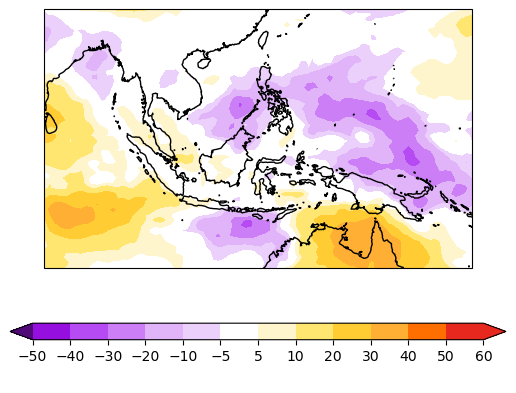

In [12]:
plt.figure()
fig,ax = plt.subplots(1,1,subplot_kw={'projection':proj}) 
clevs = [-50,-40,-30,-20,-10,-5,5,10,20,30,40,50,60]
olrPlot = (olra.mean(axis=0)
               .plot.contourf("lon", "lat",              
                              transform=proj,     
                              ax=ax,            
                              levels=clevs,      
                              cmap=olr_anml_cmap,     
                              add_colorbar=True,  
                              extend='both',  
                              cbar_kwargs={'orientation': 'horizontal', 'aspect': 30, 'label': ' ', 'ticks':clevs}) 
                              )
ax.coastlines()
plt.show()

## Homework 2

```{admonition} Homework #2
:class: seealso
請以xarray開啟CMORPH降雨資料，繪製CMORPH降雨的月氣候場和月距平。
1. 以`groupby`計算降雨的daily climatology (1998-2020)，然後將5月做月平均並繪製五月降雨氣候平均地圖。
2. 計算CMORPH降雨的daily anomaly，將2022年5月1-5, 6-10, 11-15日分別平均起來繪製成侯 (pentad) 平均降雨地圖，以及侯距平 (pentad anomaly) 平均地圖 (有3侯，請畫6張圖)。
3. 請根據所畫出來的地圖描述五月降雨氣候特徵，以及所選的3侯降雨有什麼樣的特色。

繪圖的範圍請限制在40˚~180˚E, 20˚S-40˚N。繳交的時候請上傳程式碼 (`.py`或`.ipynb`皆可)、圖 (總共7張圖) 和降雨特色的描述 (可以是Word, PPT, PDF格式)。 
```